## Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from math import sqrt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## import train dataset

In [2]:
Data=pd.read_csv('D:\\tableau\\First_Model\\train_v9rqX0R.csv')
Data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


## Check for Missing values

In [3]:
Data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Here the columns (Item_Weight and Outlet_Size) have missing values .  In order to fill the missing values,

### 1. For  Item_Weight , missing values are filled using the mean of that column.
### 2. For  Outlet_Size , missing values are filled using the most occured size of that column.

In [4]:
Data['Item_Weight']=Data['Item_Weight'].fillna(Data['Item_Weight'].mean())

In [5]:
Data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [6]:
Data['Outlet_Size']=Data['Outlet_Size'].fillna('Medium')
Data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## remove the least necessary columns

In [7]:
Data=Data.drop(['Item_Identifier'],axis=1)
Data=Data.drop(['Outlet_Identifier'],axis=1)

In [8]:
data=Data.copy()

## Convert the Categorical values to numerical values

In [9]:
le=LabelEncoder()
data['Item_Fat_Content']=le.fit_transform(data['Item_Fat_Content'])
data['Item_Type']=le.fit_transform(data['Item_Type'])
data['Outlet_Size']=le.fit_transform(data['Outlet_Size'])
data['Outlet_Location_Type']=le.fit_transform(data['Outlet_Location_Type'])
data['Outlet_Type']=le.fit_transform(data['Outlet_Type'])

In [10]:
data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,1,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.920,2,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.500,1,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.200,2,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.930,1,0.000000,9,53.8614,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,13,214.5218,1987,0,2,1,2778.3834
8519,8.380,2,0.046982,0,108.1570,2002,1,1,1,549.2850
8520,10.600,1,0.035186,8,85.1224,2004,2,1,1,1193.1136
8521,7.210,2,0.145221,13,103.1332,2009,1,2,2,1845.5976


## Find the outliers

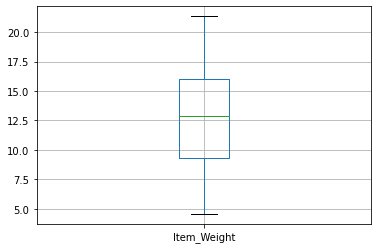

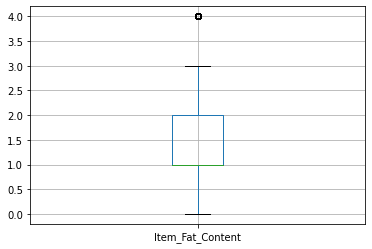

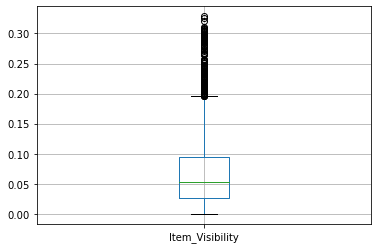

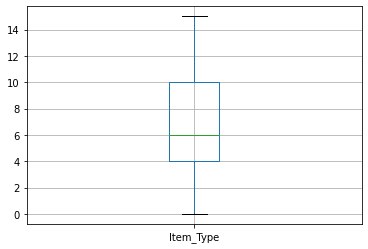

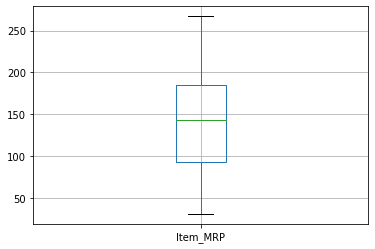

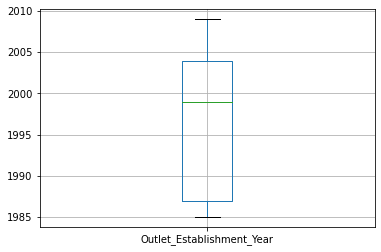

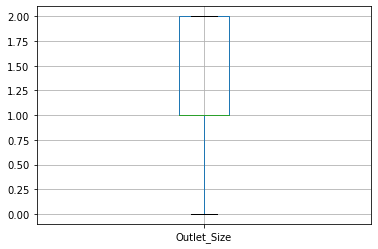

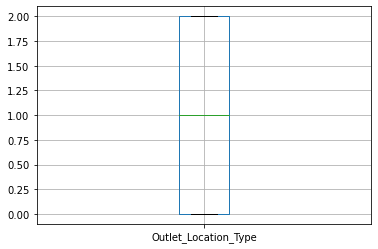

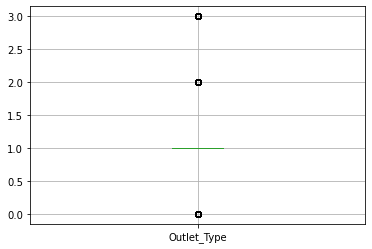

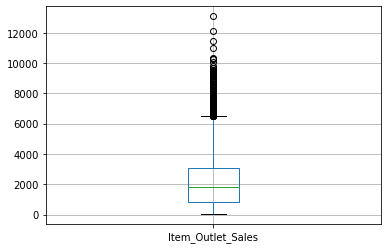

<Figure size 432x288 with 0 Axes>

In [11]:
for columns in data:
    data.boxplot([columns])
    plt.figure()

## In the column (Item_Visibility) , there are some values which are greater than 0.18. Filter those values

In [12]:
data1=data.loc[data['Item_Visibility']<0.18]
data=data1
data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,1,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.920,2,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.500,1,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.200,2,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.930,1,0.000000,9,53.8614,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,13,214.5218,1987,0,2,1,2778.3834
8519,8.380,2,0.046982,0,108.1570,2002,1,1,1,549.2850
8520,10.600,1,0.035186,8,85.1224,2004,2,1,1,1193.1136
8521,7.210,2,0.145221,13,103.1332,2009,1,2,2,1845.5976


In [13]:
data.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8295.000000,8295.000000,8295.000000,8295.000000,8295.000000,8295.000000,8295.000000,8295.000000,8295.000000,8295.000000
mean,12.869502,1.368535,0.061813,7.234599,141.083597,1997.968776,1.162990,1.117300,1.227004,2221.626671
std,4.246871,0.643679,0.044653,4.201770,62.203372,8.352949,0.600181,0.807852,0.785659,1703.255519
min,4.555000,0.000000,0.000000,0.000000,31.290000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,9.300000,1.000000,0.026603,4.000000,93.994900,1987.000000,1.000000,0.000000,1.000000,885.514000
50%,12.857645,1.000000,0.052177,6.000000,143.015400,1999.000000,1.000000,1.000000,1.000000,1840.937000
75%,16.100000,2.000000,0.090432,10.000000,185.756900,2004.000000,2.000000,2.000000,1.000000,3131.923200
max,21.350000,4.000000,0.179807,15.000000,266.888400,2009.000000,2.000000,2.000000,3.000000,13086.964800


In [14]:
correlation=data.corr()
correlation

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.019531,-0.005034,0.027485,0.024952,-0.007435,-0.007660,0.005788,-0.003309,0.009388
Item_Fat_Content,-0.019531,1.000000,0.037814,-0.111813,0.000645,0.000817,-0.013189,-0.002222,-0.002134,0.011388
Item_Visibility,-0.005034,0.037814,1.000000,-0.035132,0.002745,-0.023425,0.030511,-0.010957,-0.082164,-0.062462
Item_Type,0.027485,-0.111813,-0.035132,1.000000,0.027855,0.004857,-0.001730,0.002797,0.001616,0.016243
Item_MRP,0.024952,0.000645,0.002745,0.027855,1.000000,0.006133,0.004184,0.004031,-0.002985,0.577275
Outlet_Establishment_Year,-0.007435,0.000817,-0.023425,0.004857,0.006133,1.000000,0.222732,-0.116525,-0.154129,-0.069511
Outlet_Size,-0.007660,-0.013189,0.030511,-0.001730,0.004184,0.222732,1.000000,-0.607148,-0.188935,-0.074643
Outlet_Location_Type,0.005788,-0.002222,-0.010957,0.002797,0.004031,-0.116525,-0.607148,1.000000,0.479872,0.088098
Outlet_Type,-0.003309,-0.002134,-0.082164,0.001616,-0.002985,-0.154129,-0.188935,0.479872,1.000000,0.381894
Item_Outlet_Sales,0.009388,0.011388,-0.062462,0.016243,0.577275,-0.069511,-0.074643,0.088098,0.381894,1.000000


<AxesSubplot:>

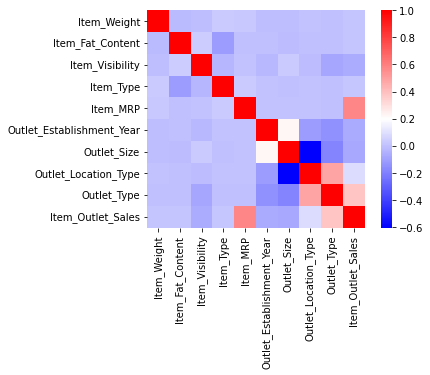

In [15]:
sns.heatmap(data=correlation,square=True,cmap='bwr')

# Analysis

## 1. find which content of Fat is more in the column (Item_Fat_Content)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

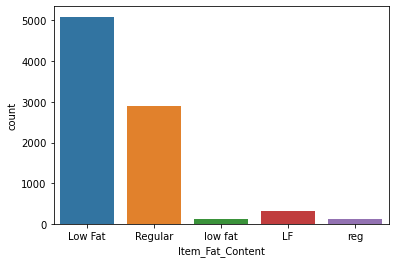

In [16]:
sns.countplot('Item_Fat_Content',data=Data)

## Here Low fat content is the most occured fat content (5089)

## 2. find which Item is more in the column (Item_Type)

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

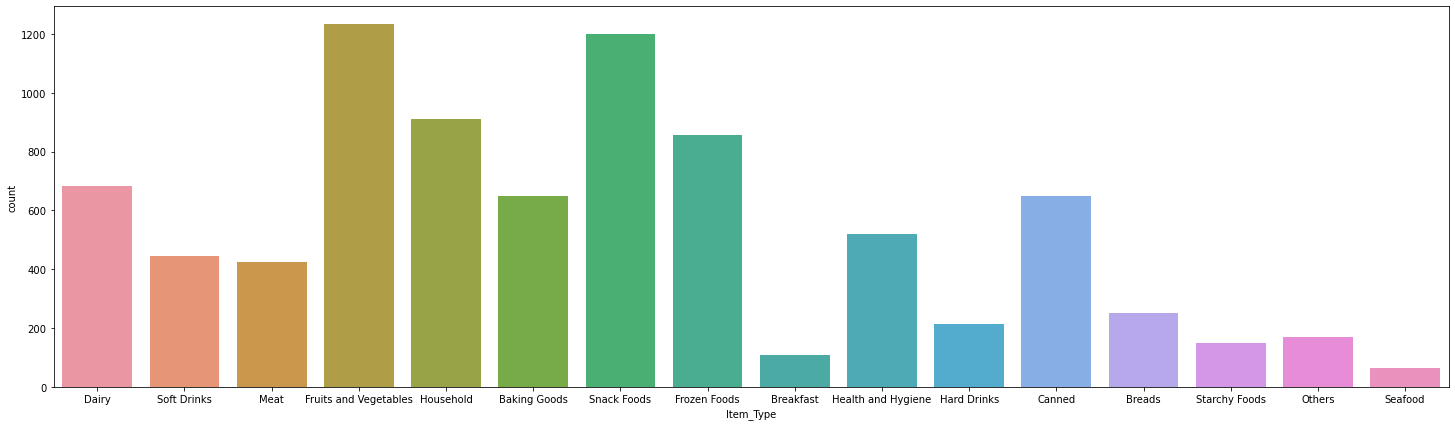

In [17]:
plt.figure(figsize=(25,7))
sns.countplot('Item_Type',data=Data)

## Here Fruits and Vegetables are the most occured Item(1232)

## 3.find which store type is more in the column (Outlet_Type)

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

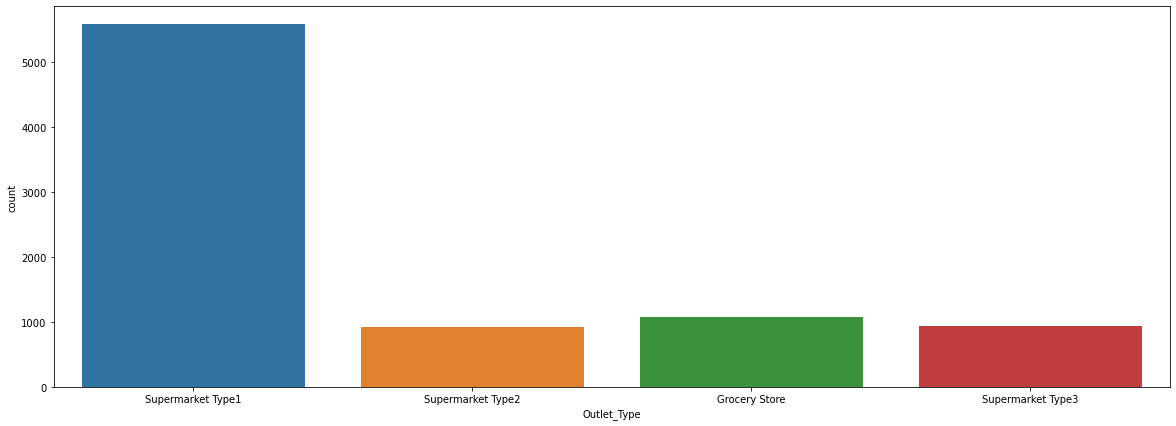

In [18]:
plt.figure(figsize=(20,7))
sns.countplot('Outlet_Type',data=Data)

## Here the Supermarket Type 1 is the most occured store(5577)

## 4. find which size is more in the column (Outlet_Type)

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

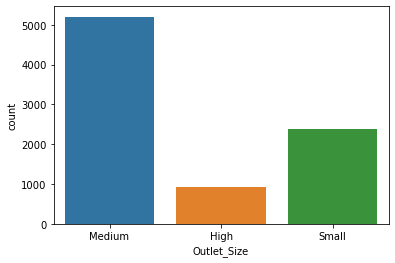

In [19]:
sns.countplot('Outlet_Size',data=Data)

## Here the Medium is the most occured outlet size(5203)

## Model Building

## 1. For this project , 3 models are used - linear regression , decision tree regression and Random Forest regression . 

## 2. There are 3 procedures followed for the 3 models - train , validate and Predict .

## 3. Train-Test-Split is used on train dataset with a test size of 0.3 and random state of 4 . Using that split , models are subjected for training and validation.    

## 4. Using adjusted r2_score and RMSE as evaluating Metrics ,  the Model with highest adjusted r2 score and lowest RMSE score is taken for prediction. 

# 1. Linear Regression

In [20]:
x=data.drop(['Item_Outlet_Sales'],axis=1)
y=data['Item_Outlet_Sales']
lin=LinearRegression()
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=4)
lin.fit(xtrain,ytrain)

LinearRegression()

In [21]:
pred=lin.predict(xtest)
r1=r2_score(pred,ytest)

In [22]:
def adjusted_r2(r,n,p):
    return ((r-(p/(n-1)))*((n-1)/(n-p-1)))

In [23]:
adjusted_r2(r1,8295,9)

0.09610357573289426

In [24]:
sqrt(mean_squared_error(pred,ytest))

1162.314665715996

## The adjusted r2 score for Linear regression = 0.0961 and it's RMSE score = 1162.314

# 2. Decision Tree Regression

In [25]:
dec=DecisionTreeRegressor(max_depth=40)
dec.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=40)

In [26]:
pred=dec.predict(xtest)
r2=r2_score(pred,ytest)

In [27]:
adjusted_r2(r2,8295,9)

0.22522399287154202

In [28]:
sqrt(mean_squared_error(pred,ytest))

1529.6899846895017

## The adjusted r2 score for Decision Tree Regression = 0.2252 and it's RMSE score = 1529.689

# 3. Random Forest Regression

In [29]:
ran=RandomForestRegressor(max_depth=40)
ran.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=40)

In [30]:
pred=ran.predict(xtest)
r3=r2_score(pred,ytest)

In [31]:
adjusted_r2(r3,8295,9)

0.33266864001289237

In [32]:
sqrt(mean_squared_error(pred,ytest))

1105.9429861029043

## The adjusted r2 score for Random Forest Regression = 0.3326 and it's RMSE score = 1105.942

## From the above results , the Values of adjusted r2 score and rmse score is better for Random Forest Regression

In [33]:
results = [['Linear regression', 0.0961 , 1162.314], ['decision tree regression', 0.2252 , 1529.689], ['random forest regression', 0.3326 , 1105.942]]
results = pd.DataFrame(results, columns=['regression models', 'adjusted r2 score','rmse'])
results

,regression models,adjusted r2 score,rmse
0,Linear regression,0.0961,1162.314
1,decision tree regression,0.2252,1529.689
2,random forest regression,0.3326,1105.942


## Import the given test dataset. Use the test Dataset in the Random Forest Regressor for prediction

In [34]:
test=pd.read_csv('D:\\tableau\\First_Model\\test_AbJTz2l.csv')
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [35]:
test=test.drop(['Item_Identifier','Outlet_Identifier'],axis=1)
test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,8.300,reg,0.038428,Dairy,87.3198,2007,NaN,Tier 2,Supermarket Type1
2,14.600,Low Fat,0.099575,Others,241.7538,1998,NaN,Tier 3,Grocery Store
3,7.315,Low Fat,0.015388,Snack Foods,155.0340,2007,NaN,Tier 2,Supermarket Type1
4,NaN,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...
5676,10.500,Regular,0.013496,Snack Foods,141.3154,1997,Small,Tier 1,Supermarket Type1
5677,7.600,Regular,0.142991,Starchy Foods,169.1448,2009,Medium,Tier 3,Supermarket Type2
5678,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,2002,NaN,Tier 2,Supermarket Type1
5679,15.300,Regular,0.000000,Canned,214.6218,2007,NaN,Tier 2,Supermarket Type1


In [36]:
test.isnull().sum()

Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [37]:
test['Item_Weight']=test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [38]:
test['Outlet_Size'].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [39]:
test['Outlet_Size']=test['Outlet_Size'].fillna('Medium')

In [40]:
test['Item_Fat_Content']=le.fit_transform(test['Item_Fat_Content'])
test['Item_Type']=le.fit_transform(test['Item_Type'])
test['Outlet_Size']=le.fit_transform(test['Outlet_Size'])
test['Outlet_Location_Type']=le.fit_transform(test['Outlet_Location_Type'])
test['Outlet_Type']=le.fit_transform(test['Outlet_Type'])

In [41]:
test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,1,0.007565,13,107.8622,1999,1,0,1
1,8.300000,4,0.038428,4,87.3198,2007,1,1,1
2,14.600000,1,0.099575,11,241.7538,1998,1,2,0
3,7.315000,1,0.015388,13,155.0340,2007,1,1,1
4,12.695633,2,0.118599,4,234.2300,1985,1,2,3
...,...,...,...,...,...,...,...,...,...
5676,10.500000,2,0.013496,13,141.3154,1997,2,0,1
5677,7.600000,2,0.142991,15,169.1448,2009,1,2,2
5678,10.000000,1,0.073529,8,118.7440,2002,1,1,1
5679,15.300000,2,0.000000,3,214.6218,2007,1,1,1


In [42]:
pred=ran.predict(test)
pred

array([1636.716166, 1109.848652,  591.59659 , ..., 2086.923468,
       4410.319122, 1526.732664])

##  attach the predicted values as one of the columns of test dataset

In [43]:
test['Item_Outlet_Sales']=pred
test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,20.750000,1,0.007565,13,107.8622,1999,1,0,1,1636.716166
1,8.300000,4,0.038428,4,87.3198,2007,1,1,1,1109.848652
2,14.600000,1,0.099575,11,241.7538,1998,1,2,0,591.596590
3,7.315000,1,0.015388,13,155.0340,2007,1,1,1,2423.711740
4,12.695633,2,0.118599,4,234.2300,1985,1,2,3,6640.076664
...,...,...,...,...,...,...,...,...,...,...
5676,10.500000,2,0.013496,13,141.3154,1997,2,0,1,2090.185888
5677,7.600000,2,0.142991,15,169.1448,2009,1,2,2,2621.161388
5678,10.000000,1,0.073529,8,118.7440,2002,1,1,1,2086.923468
5679,15.300000,2,0.000000,3,214.6218,2007,1,1,1,4410.319122
